# Exercise 2: Introduction to Deep Learning

In the following exercise we explore the basic building blocks of deep learning: the perceptron and how to stack multiple perceptrons together into layers to build a neural network.

### Installation:

This exercise will use `numpy`, `tensorflow`, and `keras`. Execute the next cell to install those requirements in your current conda environment. This needs to be done only once.

### Acknowledgements

This notebook was created by Nils Eckstein, Julia Buhmann, and Jan Funke.

In [ ]:
!pip install numpy tensorflow keras matplotlib

## Part 1: Perceptrons

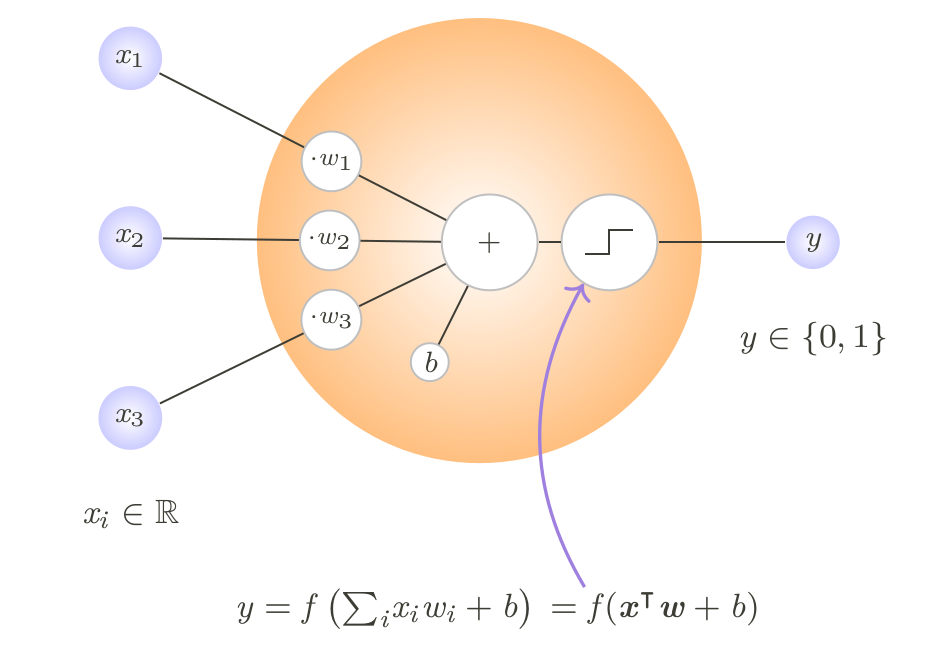

As we saw in the lecture ["Introduction to Deep Learning"](intro_dl_lecture.pdf), a perceptron is a simple unit that combines its inputs $x_i$ in a linear fashion (using weights $w_i$ and a bias $b$), followed by a non-linear function $f$.

### Task 1: Implement a Perceptron Function

Using only `numpy`, write a function `perceptron(x, w, b, f)` that returns `y` as computed by a perceptron, for arbitrary inputs `x` of dimension `n`. The arguments of your function should be:

* `x`: the input of the perceptron, a `numpy` array of shape `(n,)`
* `w`: the weights of the perceptron, a `numpy` array of shape `(n,)`
* `b`: a single scalar value for the bias
* `f`: a nonlinear function $f: \mathbb{R}\mapsto\mathbb{R}$

Test your perceptron function on 2D inputs (i.e., `n=2`) and plot the result. Change the weights, bias, and the function $f$ and see how the output of the perceptron changes.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(x, w, b, f):
    '''Implement your solution here.'''

# plot output of perceptron using matplotlib

In [ ]:
#######################
# Solution for Task 1 #
#######################

import numpy as np
import matplotlib.pyplot as plt

def perceptron(x, w, b, f):
    
    activation = x.dot(w) + b
    return f(activation)

# some test weights, bias, and f

w = np.array([0.1, -0.1])
b = 0.1
f = lambda a: 0.0 if a <= 0 else 1.0
f = lambda a: 1.0/(1 + np.exp(-a))

# plot output for x in [-1, 1]

num = 100  # number of points in x1 and x2
x1s = np.linspace(-1, 1, num=num)
x2s = np.linspace(-1, 1, num=num)
xs = np.stack(np.meshgrid(x1s, x2s)).T.reshape(-1,2)
ys = np.array(list(perceptron(x, w, b, f) for x in xs))
ys = ys.reshape(num, num)

plt.title("Perceptron Output")
plt.contourf(x1s, x2s, ys)
plt.colorbar()
plt.show()

### Task 2: Create a 2-Layer Network for XOR

XOR is a fundamental logic gate that outputs `1` whenever there is an odd number of `1` in its input and `0` otherwise. For two inputs this can be thought of as an "exclusive or" operation and the associated boolean function is fully characterized by the following truth table.

| x1 | x2 | y = XOR(x1, x2) |
|---|---|----------|
| 0 | 0 |    0     |
| 0 | 1 |    1     |
| 1 | 0 |    1     |
| 1 | 1 |    0     |

The function of an XOR gate can also be understood as a classification problem on $x \in \{0,1\}^2$ and we can think about designing a classifier acting as an XOR gate. It turns out that this problem is not solvable by a single perceptron (https://en.wikipedia.org/wiki/Perceptron) because the set of points $\{(0,0), (0,1), (1,0), (1,1)\}$ is not linearly seperable.

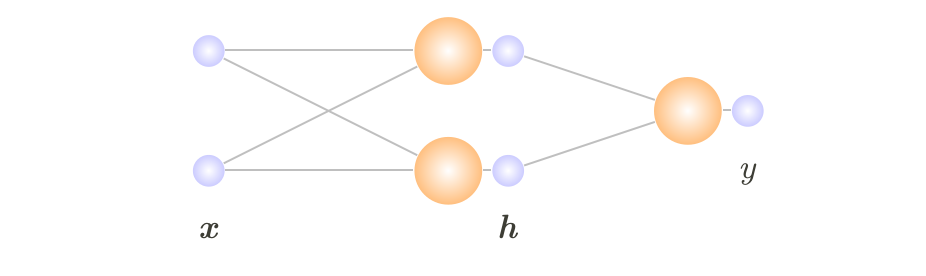

Design a two layer perceptron using your `perceptron` function above that implements an XOR Gate on two inputs. Think about the flow of information through this simple network and set the weight values by hand such that the network produces the XOR function.

#### Hint

A single layer in a multilayer perceptron can be described by the equation $y = f(x^\intercal w + b)$ with $f$ a nonlinear function. $b$ is the so called bias, a constant offset vector and $w$ a vector of weights. Since we are only interested in outputs of `0` or `1`, a good choice for $f$ is the threshold function. Think about which kind of logical operations you can implement with a single perceptron, then see how you can combine them to create an XOR. It might help to write down the equation for a two layer perceptron network.

In [ ]:
import numpy as np

def generate_xor_data():
    xs = [np.array([i, j]) for i in [0,1] for j in [0,1]]
    ys = [int(np.logical_xor(x[0], x[1])) for x in xs]
    return xs, ys
    
print(generate_xor_data())

"""
Implement your solution here.
"""

### Solution

| x1 | x2 | AND(NOT x1, x2) | AND(x1, NOT x2) | OR[AND(NOT x1, x2), AND(x1, NOT x2)]| XOR(x1, x2) |
|---|---|---------------|--------------|---------------------------------|----------|
| 0 | 0 |    0          |      0       |                 0               |    0     |
| 0 | 1 |    1          |      0       |                 1               |    1     |
| 1 | 0 |    0          |      1       |                 1               |    1     |
| 1 | 1 |    0          |      0       |                 0               |    0     |

We can implement XOR as a combination of 2 AND Gates and 1 OR gate where each neuron in the network acts as one of these gates.

In [ ]:
def threshold(vector):
    return (vector>=0.5).astype(float)

# two-layer perceptron
def mlp(x, w00, w01, w1, b00, b01, b1, f):
    x00 = perceptron(x, w00, b00, f)
    x01 = perceptron(x, w01, b01, f)
    x0 = np.array([x00, x01])
    x1 = perceptron(x0, w1, b1, f)
    return x1

# AND(NOT X, Y)
w_andnotxy = np.array([-1.0, 1.0])
# AND(X, NOT Y)
w_andxnoty = np.array([1.0, -1.0])

# OR(X,Y)
w_or = np.array([1., 1.])

# No biases needed
b00 = 0.0
b01 = 0.0
b1 = 0.0

print("Input", "Output", "XOR")
xs, ys = generate_xor_data()
for x, y in zip(xs, ys):
    print(x, int(mlp(x, w_andnotxy, w_andxnoty, w_or, b00, b01, b1, threshold)),"    ", y)

## Part 2: "Deep" Neural Networks

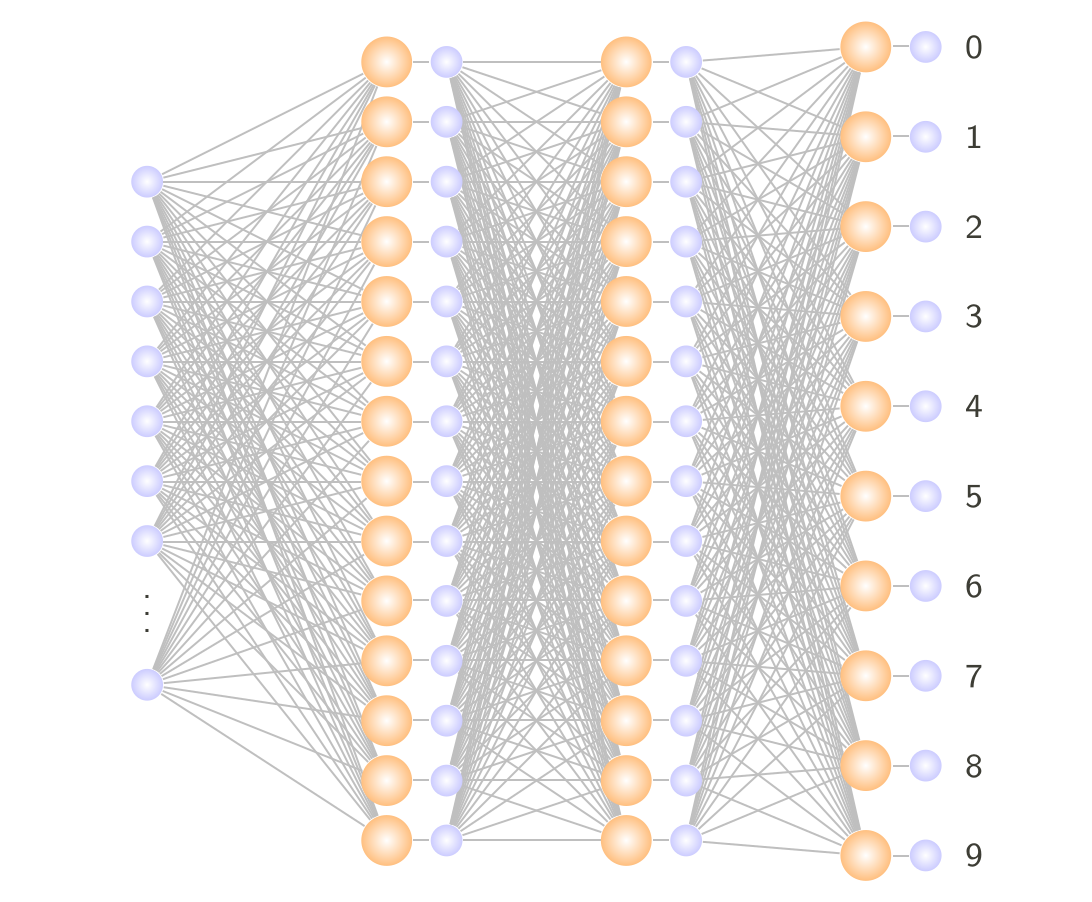

### Task 3: Use Keras to Train a Simple Network

The previous task demonstrated that chosing the weights of a neural network by hand can be quite painful even for simple functions. This will certainly get out of hand once we have more complex networks with several layers and many neurons per layer. But more importantly, the reason why we want to use neural networks to approximate a function is that (in general) we do not know exactly what the function is. We only have data points that describe the function implicitly.

In this task, we will design, train, and evaluate a neural network that can classify points of two different classes on a 2D plane, i.e., the input to our network are the coordinates of points in a plane.

For that, we will create a training and a testing dataset. We will use stochastic gradient descent to train a network on the training dataset and evaluate its performance on the testing dataset.

#### Data

We create both training and testing dataset from the following function (in practice, we would not know this function but have only the data available):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def generate_spiral_data(n_points, noise=1.0):
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X_train, y_train = generate_spiral_data(100)

plt.title('Training set')
plt.plot(X_train[y_train==0,0], X_train[y_train==0,1], '.', label='Class 1')
plt.plot(X_train[y_train==1,0], X_train[y_train==1,1], '.', label='Class 2')
plt.legend()
plt.show()

X_test, y_test = generate_spiral_data(1000)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.', label='Class 1')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.', label='Class 2')
plt.legend()
plt.show()

#### Task 3.1: Improve the Baseline Model

We will start with a simple baseline model, consisting of one hidden layer with 12 neurons (or perceptrons).

This baseline model performs pretty poorly. Try to find a more advanced architecture that is able to solve the classification problem. Read the following code snippet and understand the involved functions:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

bad_model = Sequential()
bad_model.add(Dense(12, input_dim=2, activation='tanh'))
bad_model.add(Dense(1, activation='sigmoid'))

bad_model.compile(loss='mean_squared_error',
                  optimizer='SGD', # SGD = Stochastic Gradient Descent
                  metrics=['accuracy'])

# Train the model
bad_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

# Predict on the testing data
bad_prediction = np.round(bad_model.predict(X_test).T[0])

# Show the result
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Bad model classification')
plt.plot(X_test[bad_prediction==0,0], X_test[bad_prediction==0,1], '.')
plt.plot(X_test[bad_prediction==1,0], X_test[bad_prediction==1,1], '.')
plt.show()

Vary width and depth of the network and play around with activation functions, loss functions, and optimizers to achieve a better result. Read up on parameters and functions for sequential models at https://keras.io/getting-started/sequential-model-guide/. Use the next cell for your solution:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

"""
Create a "good" model that perorms better than the baseline model above
"""
good_model = ...

# Train the model
good_model.fit(X_train, y_train, epochs=150, batch_size=10,  verbose=0)

# Predict on the testing data
good_prediction = np.round(good_model.predict(X_test).T[0])

# Show the result
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Good model classification')
plt.plot(X_test[good_prediction==0,0], X_test[good_prediction==0,1], '.')
plt.plot(X_test[good_prediction==1,0], X_test[good_prediction==1,1], '.')
plt.show()

In [ ]:
#########################
# Solution for Task 3.1 #
#########################

from keras.models import Sequential
from keras.layers import Dense

good_model = Sequential()
good_model.add(Dense(64, input_dim=2, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(64, activation='relu'))
good_model.add(Dense(1, activation='sigmoid'))

good_model.compile(loss='binary_crossentropy',
                   optimizer='adam',
                   metrics=['accuracy'])

good_model.fit(X_train, y_train, epochs=1500, batch_size=10, verbose=0)

# Predict on the testing data
good_prediction = np.round(good_model.predict(X_test).T[0])

# Show the result
plt.subplot(1,2,1)

plt.title('Test set')
plt.plot(X_test[y_test==0,0], X_test[y_test==0,1], '.')
plt.plot(X_test[y_test==1,0], X_test[y_test==1,1], '.')
plt.subplot(1,2,2)

plt.title('Good model classification')
plt.plot(X_test[good_prediction==0,0], X_test[good_prediction==0,1], '.')
plt.plot(X_test[good_prediction==1,0], X_test[good_prediction==1,1], '.')
plt.show()

#### Task 3.2: Visualize the decision boundary of your model

Visualize the output of your model for all 2D inputs with coordinates between -15 and 15, similar to how we plotted the output of the perceptron in Task 1. Compare the outputs of the baseline model with yours. See how the model performs outside the intervals it was trained on.

In [ ]:
"""
Implement your solution here.
"""

In [ ]:
#########################
# Solution for Task 3.2 #
#########################

# Generate grid:
line = np.linspace(-15,15)
xx, yy = np.meshgrid(line,line)
grid = np.stack((xx,yy))

# Reshape to fit model input size:
grid = grid.T.reshape(-1,2)

# Predict:
good_prediction = good_model.predict(grid)
bad_prediction = bad_model.predict(grid)

# Reshape to grid for visualization:
plt.title("Good Decision Boundary")
good_prediction = good_prediction.T[0].reshape(len(line),len(line))
plt.contourf(xx,yy,good_prediction)
plt.show()

plt.title("Bad Decision Boundary")
bad_prediction = bad_prediction.T[0].reshape(len(line),len(line))
plt.contourf(xx,yy,bad_prediction)
plt.show()

# Generate grid:
line = np.linspace(-150, 150)
xx, yy = np.meshgrid(line,line)
grid = np.stack((xx,yy))

# Reshape to fit model input size:
grid = grid.T.reshape(-1,2)

# Predict:
good_prediction = good_model.predict(grid)
bad_prediction = bad_model.predict(grid)

# Reshape to grid for visualization:
plt.title("Good Decision Boundary")
good_prediction = good_prediction.T[0].reshape(len(line),len(line))
plt.contourf(xx,yy,good_prediction)
plt.show()

plt.title("Bad Decision Boundary")
bad_prediction = bad_prediction.T[0].reshape(len(line),len(line))
plt.contourf(xx,yy,bad_prediction)
plt.show()

### Task 4: Classify Hand-Written Digits

In this task, we will classify data points of higher dimensions: Each data point is now an image of size 28 by 28 pixels depicting a hand-written digit from the famous MNIST dataset.

Instead of feeding the image as one long vector into a fully connected network (as in the previous task), we will take advantage of the spatial information in images and use a convolutional neural network. As a reminder, a convolutional neural network differs from a fully connected one in that not each pair of nodes is connected, and weights are shared between nodes in one layer:

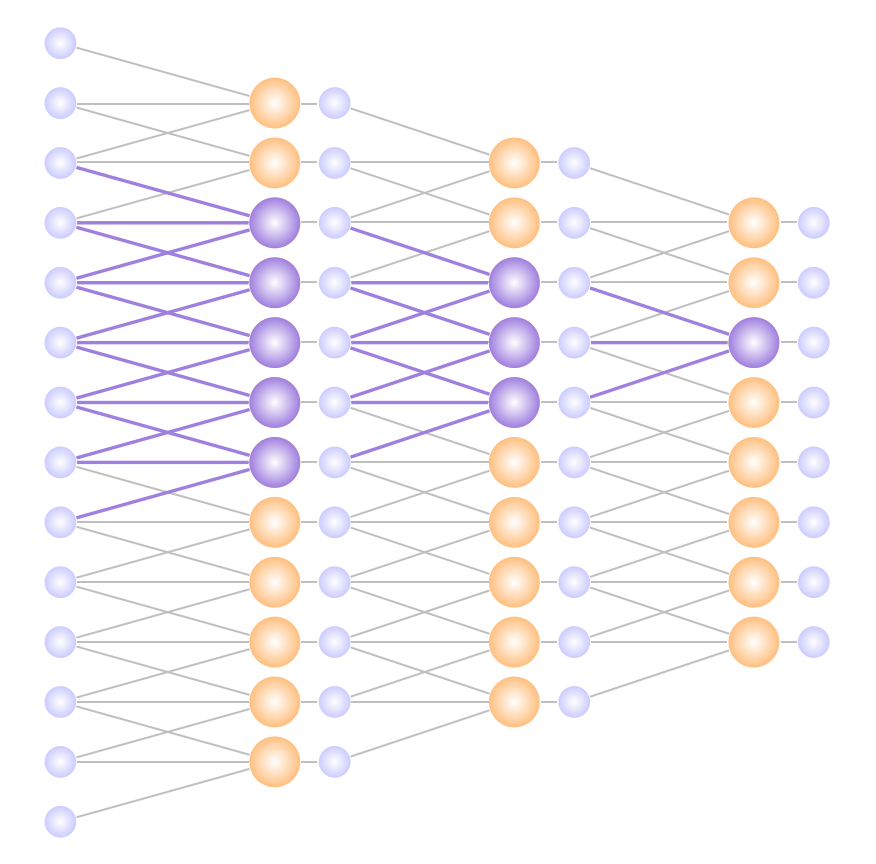

However, the output of our network will be a 10-dimensional vector, indicating the probabilities for the input to be one of ten classes (corresponding to the digits 0 to 9). For that, we will use fully connected layers at the end of our network, once the dimensionality of a feature map is small enough to capture high-level information.

In principle, we could just use convolutional layers to reduce the size of each feature map by 2 until one feature map is small enough to allow using a fully connected layer. However, it is good practice to have a convolutional layer followed by a so-called downsampling layer, which effectively reduces the size of the feature map by the downsampling factor.

### Data

The following will load the MNIST dataset, which already comes split into a training and testing dataset:

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

"""
Returns:
2 tuples:

x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
y_train, y_test: uint8 array of digit labels (integers in range 0-9) with shape (num_samples,).
"""

# Show example data
plt.subplot(1,4,1)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,2)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,3)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,4)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.show()

#### Task 4.1 Implement a Convolutional Neural Network

Create a CNN using `keras` layers with the following specifications:
* one convolution, size 3x3, 32 output feature maps, followed by a ReLU activation function
* one downsampling layer, size 2x2
* one convolution, size 3x3, 32 output feature maps, followed by a ReLU activation function
* one downsampling layer, size 2x2
* one densely connected layer with 64 units (the previous feature maps need to be flattened for that), followed by a ReLU activation function
* one densely connected layer with 10 units, followed by a SoftMax activation function (those will be the outputs of the network)

The network should be compiled to train with a categorical cross-entropy loss.

Name your network `cnn_model`.

In [ ]:
"""
Implement your solution here.
"""

### Solution

In [ ]:
#########################
# Solution for Task 4.1 #
#########################

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

input_shape = (x_train.shape[1], x_train.shape[2], 1)

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3,3),
                     activation='relu',
                     input_shape=input_shape))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Conv2D(filters=32,
                     kernel_size=(3, 3),
                     activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax')) # softmax for classification

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer='adagrad', # adaptive optimizer (still similar to SGD)
                  metrics=['accuracy'])

#### Task 4.2 Train the Network

Before we can train the CNN on the MNIST data, we have to bring the data in the right format. In particular:
* the images should have a "channel" dimension of size 1
* the intensities should be rescaled to values between 0 and 1
* the labels have to be converted into one-hot encodings

These changes are needed to fit to the CNN created above.

In [ ]:
"""
Implement your solution here.
"""

In [ ]:
#########################
# Solution for Task 4.2 #
#########################

from keras.utils import np_utils

# add a channel dimension to the images
x_train = x_train.reshape(x_train.shape[0],
                          x_train.shape[1],
                          x_train.shape[2],
                          1)
x_test = x_test.reshape(x_test.shape[0],
                        x_test.shape[1],
                        x_test.shape[2],
                        1)

# rescale intensities to be between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert the labels into one-hot encodings
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


Ready to train the network!

In [ ]:
cnn_model.fit(x_train,
             y_train,
             batch_size=128,
             epochs=10,
             verbose=1,
             validation_data=(x_test, y_test)) # never actually validate using test data!


#### Task 4.3 Predict on the Test Dataset

Once training has finished, we can see how well the network does on the testing data. Evaluate the network on the whole testing dataset and print its overall accuracy. Create predictions for the some example images from the testing dataset and show them together with the images.

In [ ]:
"""
Implement your solution here.
"""

In [ ]:
#########################
# Solution for Task 4.3 #
#########################

score = cnn_model.evaluate(x_test, y_test, verbose=0)
print('MNIST test set accuracy:', score[1])

# visualize some test data and network output
y_predict = cnn_model.predict(x_test, verbose=0)
y_predict_digits = [np.argmax(y_predict[i]) for i in range(y_predict.shape[0])]
plt.subplot(1,4,1)
plt.imshow(x_test[0,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,2)
plt.imshow(x_test[1,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,3)
plt.imshow(x_test[2,:,:,0], cmap=plt.get_cmap('gray'))
plt.subplot(1,4,4)
plt.imshow(x_test[3,:,:,0], cmap=plt.get_cmap('gray'))
plt.show()

print("CNN predictions: {0}, {1}, {2}, {3}".format(y_predict_digits[0],
                                                   y_predict_digits[1],
                                                   y_predict_digits[2],
                                                   y_predict_digits[3]))